In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact
import time

In [3]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12,4)

Computation time: 0.58


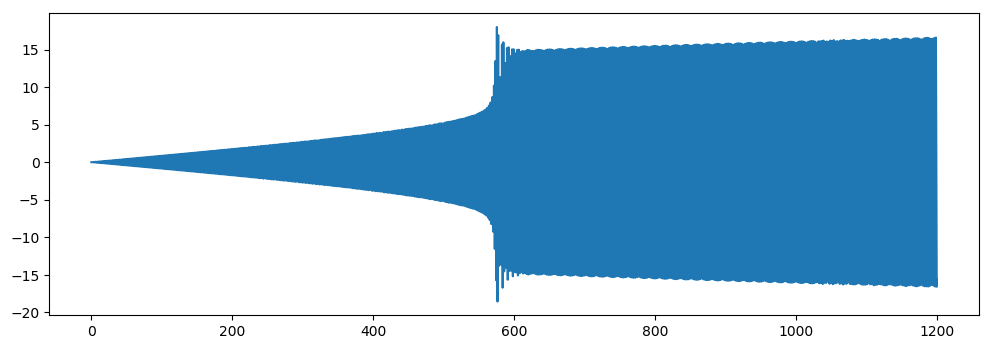

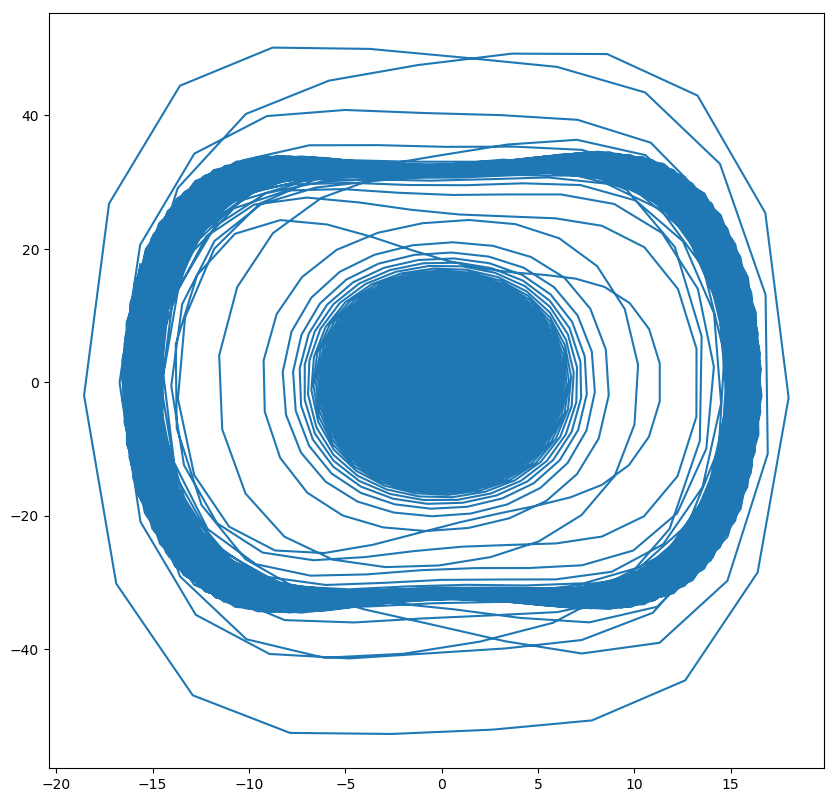

In [26]:
k = 1
c = 0.2
F0 = 0.05
w = 2.6
alpha = 0.05
m=1

Ni = 100
xr = 20
vr = 60
#x0 = np.linspace(-xr,xr,Ni)
#v0 = np.linspace(-vr,vr,Ni)
x0 = 0
v0 = 0


T = 1200
ts = 0.1
N = int(T/ts)
t = np.linspace(0,T,N)

# This takes some thinking, see debugging below!
# x will come first in the linear array, then corresponding v 
# elements
y0 = np.array(np.meshgrid(x0,v0)).flatten()

def dydt_vDuff(t,y):
    #x = y[:len(y)//2]
    #v = y[len(y)//2:]
    x = y[0]
    v = y[1]
    dxdt = v
    dvdt = (F0*t*np.cos(w*t) - c*v - k*x - alpha*x**3)/m
    #return np.concatenate([dxdt,dvdt],axis=None)
    return [dxdt, dvdt]

# Let's try it!
t1 = time.time()
sol = solve_ivp(dydt_vDuff, [0,T], y0, t_eval=t)
t2 = time.time()
print("Computation time: %.2f" %(t2-t1))

x = sol.y[0]
v = sol.y[1]
plt.plot(t,x)
plt.figure(figsize=(10,10))
plt.plot(x,v)

Computation time: 0.78


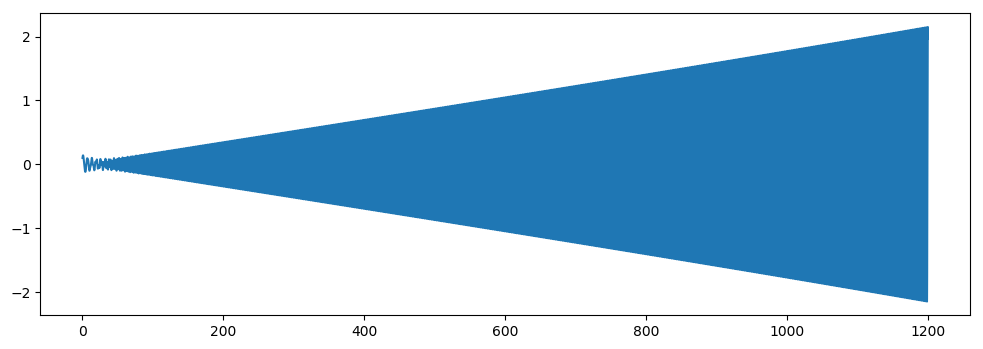

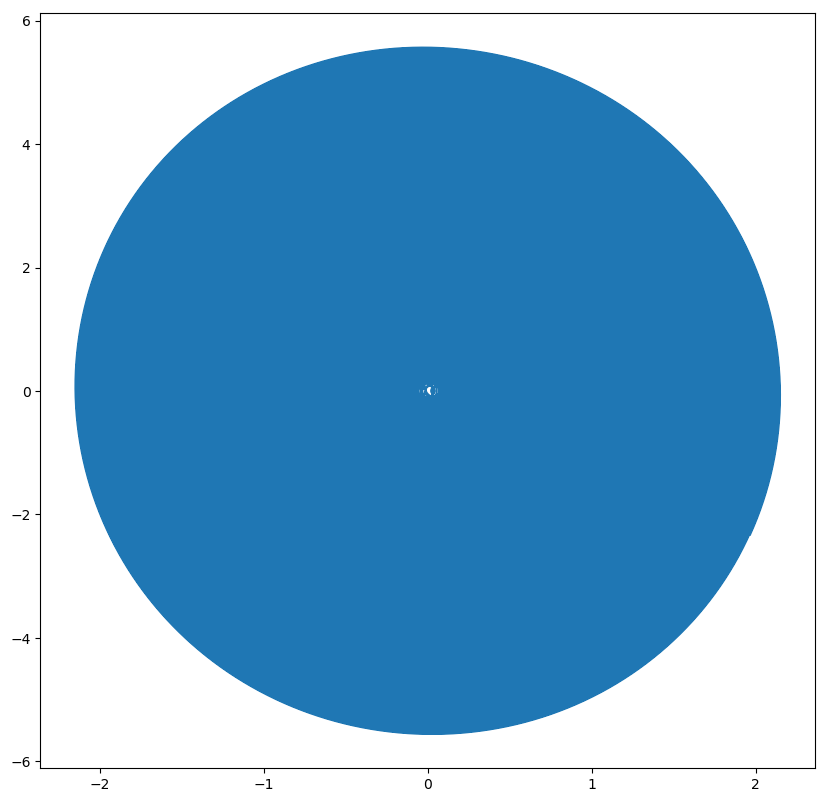

In [72]:
k = 1
c = 0.1
F0 = 0.01
w = 2.6
alpha = 0.05
m=1

Ni = 100
xr = 20
vr = 60
#x0 = np.linspace(-xr,xr,Ni)
#v0 = np.linspace(-vr,vr,Ni)
x0 = 0
v0 = 0


T = 1200
ts = 0.01
N = int(T/ts)
t = np.linspace(0,T,N)

# This takes some thinking, see debugging below!
# x will come first in the linear array, then corresponding v 
# elements
y0 = [0.1,0.1]

def dydt_vDuff(t,y):
    #x = y[:len(y)//2]
    #v = y[len(y)//2:]
    x = y[0]
    v = y[1]
    dxdt = v
    dvdt = (F0*t*np.cos(w*t) - c*v - k*x - alpha*x**3)/m
    #print(t)
    #return np.concatenate([dxdt,dvdt],axis=None)
    return(np.array([dxdt, dvdt]))

# Let's try it!
t1 = time.time()
#sol = solve_ivp(dydt_vDuff, [0,T], y0, t_eval=t)

dt=ts # time step

nsteps=int(T/dt)
sol=np.zeros([2,nsteps])
yt=np.array(y0)
tval=0.0
for j in range(nsteps):
    yt+=dt*dydt_vDuff(tval,yt)
    tval+=dt
    sol[:,j]=yt

t=dt*np.array(range(nsteps))
t2 = time.time()
print("Computation time: %.2f" %(t2-t1))

x = sol[0,:]
v = sol[1,:]
plt.plot(t,x)
plt.figure(figsize=(10,10))
plt.plot(x,v)

Computation time: 7.51


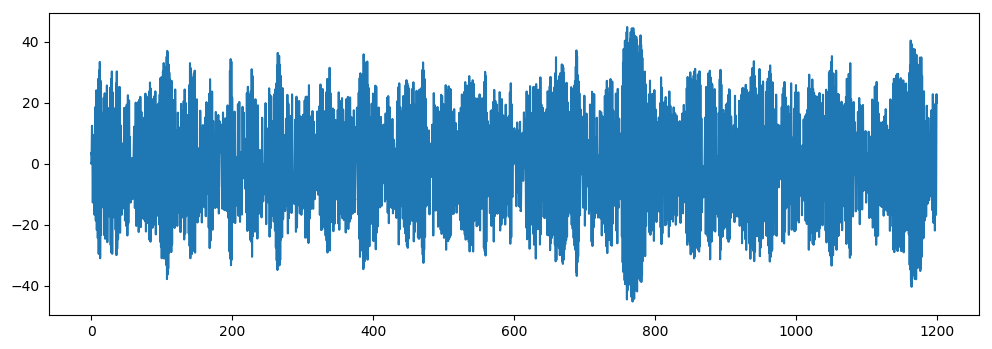

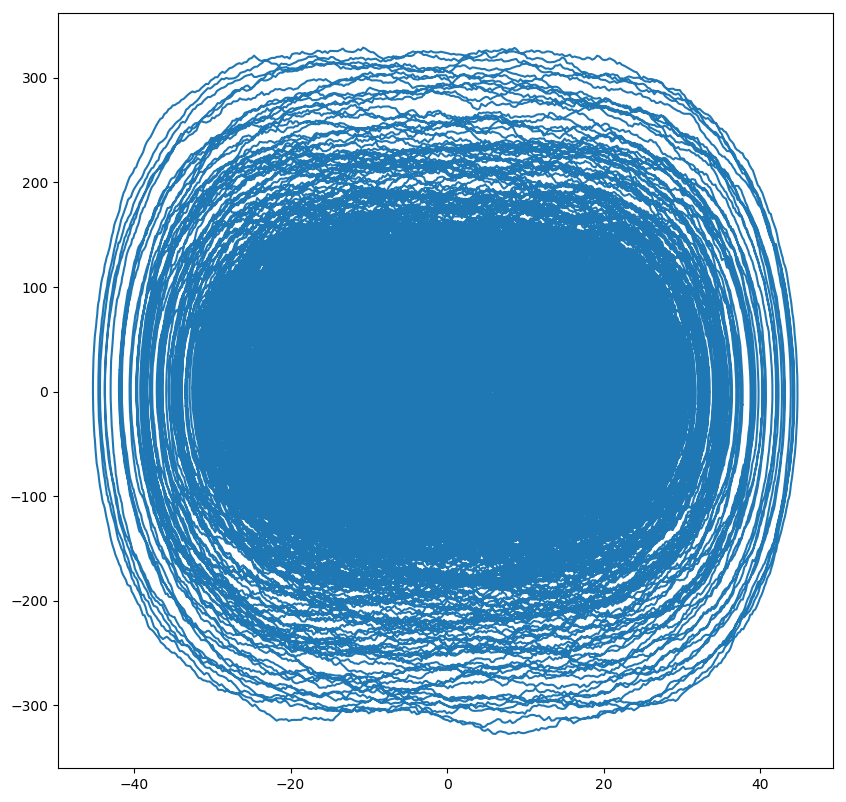

In [110]:
k = 1
c = 0.2
F0 = 40
w = 2.6
alpha = 0.05
m=1

Ni = 100
xr = 20
vr = 60
#x0 = np.linspace(-xr,xr,Ni)
#v0 = np.linspace(-vr,vr,Ni)
x0 = 0
v0 = 0


T = 1200
ts = 0.001
N = int(T/ts)
t = np.linspace(0,T,N)

# This takes some thinking, see debugging below!
# x will come first in the linear array, then corresponding v 
# elements
y0 = [0.1,0.1]

def dydt_vDuff(t,y):
    global dt, F0_norm
    #x = y[:len(y)//2]
    #v = y[len(y)//2:]
    x = y[0]
    v = y[1]
    dxdt = v
    dvdt = (F0_norm*np.random.randn() - c*v - k*x - alpha*x**3)/m
    #print(t)
    #return np.concatenate([dxdt,dvdt],axis=None)
    return(np.array([dxdt, dvdt]))

# Let's try it!
t1 = time.time()
#sol = solve_ivp(dydt_vDuff, [0,T], y0, t_eval=t)

dt=ts # time step

nsteps=int(T/dt)
sol=np.zeros([2,nsteps])
yt=np.array(y0)
tval=0.0
F0_norm=F0/np.sqrt(dt)
for j in range(nsteps):
    yt+=dt*dydt_vDuff(tval,yt)
    tval+=dt
    sol[:,j]=yt

t=dt*np.array(range(nsteps))
t2 = time.time()
print("Computation time: %.2f" %(t2-t1))

x = sol[0,:]
v = sol[1,:]
plt.plot(t,x)
plt.figure(figsize=(10,10))
plt.plot(x,v)

In [96]:
x_10 = x
dt_10 = ts

In [111]:
x_40 = x
dt_40 = ts

In [99]:
x_20 = x
dt_10 = ts

In [85]:
x_5 = x

In [87]:
x_01 = x

(0, 10)

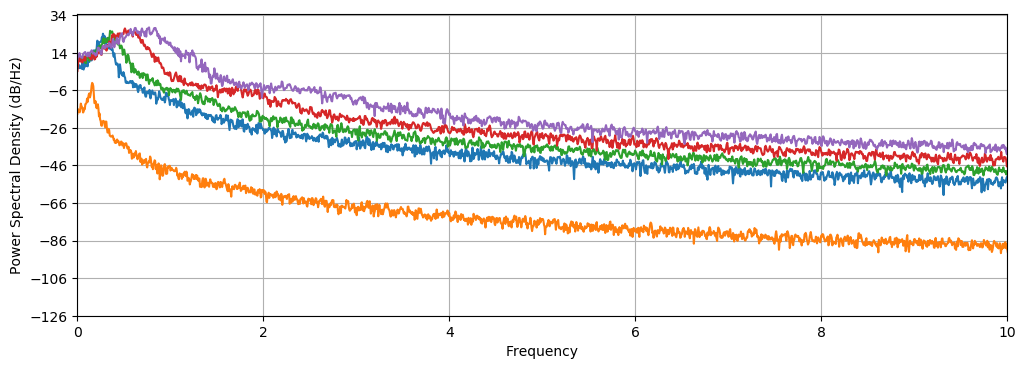

In [113]:
foo = 1024*16
ts1= 0.01
plt.psd(x_5,  foo, 1/ts1);
plt.psd(x_01,  foo, 1/ts1);
plt.psd(x_10, foo*4, 1/dt_10);
plt.psd(x_20, foo*4, 1/dt_10);
plt.psd(x_40, foo*8, 1/dt_40);


plt.xlim(0,10)

###### 